# Flux Variation in the Sun and Sun-like Kepler Stars

Figure 10.7 from Chapter 7 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plots of the flux of the Sun measured by the SOHO satellite around the time of solar maximum and the fluxes
of a group of sun-like stars with activity levels similar to that of the Sun, measured by Kepler using
data provided to us by Prof. Gibor Basri.  

The plot follows Figure 2 from [Basri et al. 2010, ApJL, 713, L155](https://ui.adsabs.harvard.edu/abs/2010ApJ...713L.155B), except the data are sampled more coarsely than in that figure to show a more
smooth long-term light curve, and the differential fluxes are scaled in units of parts per 1000 (ppt).

The data for the Sun are from the SOHO spacecraft for Solar cycle 23, the 23rd solar cycle since 1755, which ran
for 12.3 years from August 1996 until December 2008.

In [5]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [6]:
plotFile = 'Fig10_7.png' 

# graphic aspect ratio = width/height

aspect = 3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Light Curves

The light curves are in two files:
 * `ActiveSun_Cycle23.txt` - The Sun for 6 segments from SOHO during Cycle 23
 * `SunlikeKeplerStars.txt` - 6 sun-like Kepler stars: KIC2445004, KIC2718678, KIC5628737, KIC6034108, KIC6620375, and KIC6844155
 
In each the first column is the time of the light curve in days (arbitrary starting epoch), followed by differential fluxes in ppt (parts per 1000) in 6 columns as follows:
 * For the Sun: 6 segments labeled `segment1` through `segment6`
 * For the Kepler stars: one column for each of the 6 stars.

We will plot 4 solar segment and 4 Kepler stars vertically stacked with an arbitrary offset in differential flux, but you can change this by defining the `sunSegments` and `keplerStars` lists below.  Scaling vertically will
be defined by the longest of the two lists, however, we usually keep them the same length.  Segments and Kepler
Stars are listed in order 1 to 6.

We show the first 50 days of each light curve, which is 2 solar rotations.

In [7]:
dataDir = 'SunlikeStars'

fluxOffset = 2.0

# Sun SOHO differential flux light curves

sunSegments = [1,2,4,5]
photFile = f'{dataDir}/ActiveSun_Cycle23.txt'
data = pd.read_csv(photFile,sep=r'\s+',comment='#',header=None)
tSun = np.array(data[0])
dfSun = []
for i in range(len(sunSegments)):
    dfSun.append(np.array(data[sunSegments[i]]))
    dfSun[i] += i*fluxOffset
    
# Kepler star differential flux light curves

keplerStars = [1,2,3,4]
photFile = f'{dataDir}/SunlikeKeplerStars.txt'
data = pd.read_csv(photFile,sep=r'\s+',comment='#',header=None)
tKepler = np.array(data[0])
dfKepler = []
for i in range(len(keplerStars)):
    dfKepler.append(np.array(data[keplerStars[i]]))
    dfKepler[i] += i*fluxOffset
    
# Limits

numSets = np.max([len(sunSegments),len(keplerStars)])

tMin = 0.0
tMax = 50

dfMin = -0.8*fluxOffset
dfMax = (numSets-1+0.8)*fluxOffset

## Figure 10.7

Two-panel side-by-side plot.  Left: SOHO Active Sun, Right: Kepler Solar-Like stars


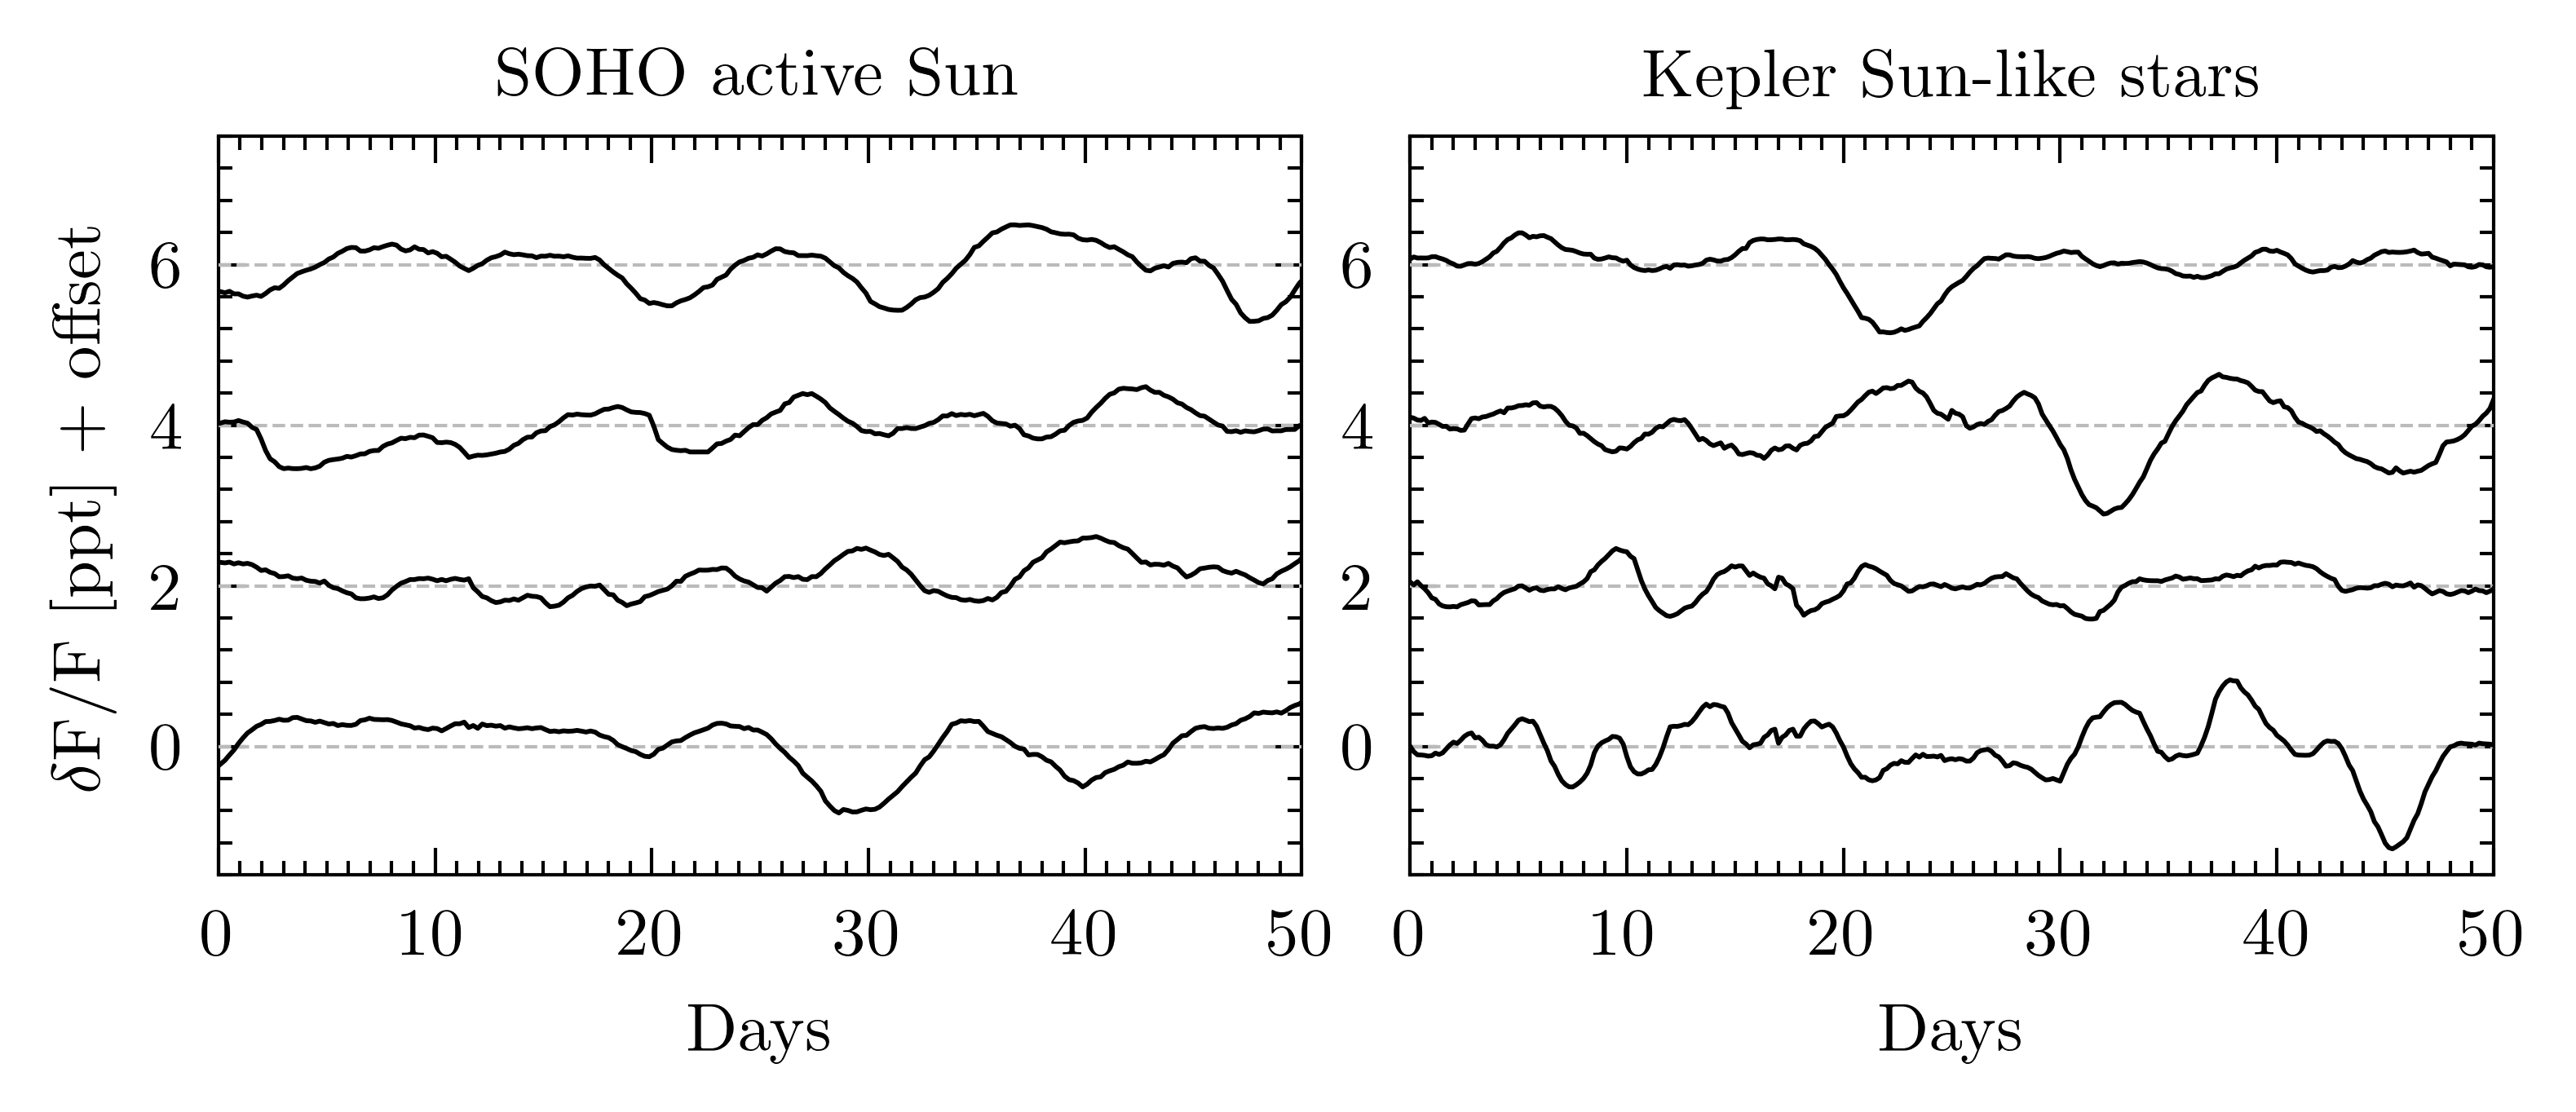

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.1, hspace=0)

# Left Panel: SOHO Active Sun

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(tMin,tMax)
ax1.set_xlabel(r'Days',fontsize=axisFontSize)
ax1.xaxis.set_major_locator(MultipleLocator(10.0))
ax1.xaxis.set_minor_locator(MultipleLocator(1.0))
ax1.set_ylim(dfMin,dfMax)
ax1.set_ylabel(r'$\delta$F/F [ppt] + offset',fontsize=axisFontSize)
ax1.yaxis.set_major_locator(MultipleLocator(fluxOffset))
ax1.yaxis.set_minor_locator(MultipleLocator(fluxOffset/5))

for i in range(len(sunSegments)):
    ax1.plot(tSun,dfSun[i],ls='-',color='black',lw=0.7,zorder=10)
    ax1.hlines(i*fluxOffset,tMin,tMax,ls=['--'],colors=['#bbbbbb'],lw=0.5,zorder=8)

ax1.set_title('SOHO active Sun',fontsize=axisFontSize)

# Right Panel: Kepler stars

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(tMin,tMax)
ax2.set_xlabel(r'Days',fontsize=axisFontSize)
ax2.xaxis.set_major_locator(MultipleLocator(10.0))
ax2.xaxis.set_minor_locator(MultipleLocator(1.0))
ax2.set_ylim(dfMin,dfMax)
ax2.yaxis.set_major_locator(MultipleLocator(fluxOffset))
ax2.yaxis.set_minor_locator(MultipleLocator(fluxOffset/5))

for i in range(len(keplerStars)):
    ax2.plot(tKepler,dfKepler[i],ls='-',color='black',lw=0.7,zorder=10)
    ax2.hlines(i*fluxOffset,tMin,tMax,ls=['--'],colors=['#bbbbbb'],lw=0.5,zorder=8)
              
ax2.set_title('Kepler Sun-like stars',fontsize=axisFontSize)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')